UNIVERSIDAD GALILEO

Marco Vinicio Escalante Lara

Carnet: 19001148


# DETECCIÓN DE ANOMALIAS


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargamos los datos

Para cargar los datos empleamos pandas, las cuales descargamos de la carpeta compartida y la dejamos con el nombre "Estaturas" en formato CSV, si no tiene edad le colocamos el promedio de edades de todas los ingresos.

In [124]:
datos = pd.read_csv("Estaturas.csv")
datos.Edad = datos.Edad.fillna(datos.Edad.mean())
datos.head()

,Estatura,Edad
0,1.77,26.000000
1,1.74,31.000000
2,1.72,24.000000
3,1.78,27.117647
4,1.65,32.000000


### Media y Covarianza
Determinamos la media y covarianza de nuestros datos.

In [127]:
media = np.mean(datos.values, axis=0)
media

array([ 1.73142857, 27.11764706])

In [128]:
covarianza = np.cov(datos.values.T)
covarianza

array([[5.40285714e-03, 2.70294118e-02],
       [2.70294118e-02, 1.24882353e+01]])

In [129]:
from scipy.stats import multivariate_normal
x, y = np.meshgrid(datos.Edad.values, datos.Estatura.values)
pos = np.dstack((y,x))
rv = multivariate_normal(mean=media,cov=covarianza)

x.shape, y.shape, pos.shape

((21, 21), (21, 21), (21, 21, 2))

### Datos - gráficas

Mostramos la información de nuestros datos por medio de una gráfica.

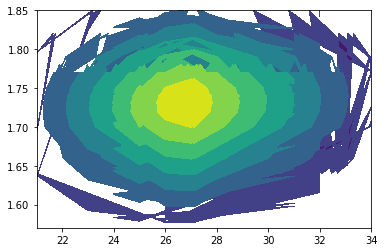

In [130]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [132]:
def anomalias(prueba, rango=0.2):
    x, y = np.meshgrid(datos.Edad.values, datos.Estatura.values)
    pos = np.dstack((y,x))
    multivarida = multivariate_normal(mean=media,cov=covarianza)

    a = multivarida.pdf(prueba)
    if a < rango:
        print ("Es anomalia")
    else:
        print("No es anomalía")

In [134]:
anomalias(np.array([1.75, 27]))

No es anomalía
